
# Project: Investigate a Dataset of not showing in the appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I aim to conduct an analysis of a dataset containing records of patients, with a primary focus on determining the factors that influence whether a patient shows up or does not show up for their scheduled appointment. The dataset includes a variety of variables that can be explored to examine their relationships with the target variable — No-show.

### Question(s) for Analysis


1-What is the percentage of patients who showed up versus those who did not show up for their appointments?

2-Does sending an SMS reminder reduce the likelihood of a no-show?

3-Is age related to the likelihood of a no-show, and what is the distribution of age among patients?



<a id='wrangling'></a>
## Data Wrangling







1-import necessary packages and load data 



In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load data 
df = pd.read_csv('show_appointments.csv')


2-Assessing Data


a. Initial Observations


In [3]:
# Inspect data 
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Outcomes:
- Data size is 110527
- column names need to be change because of typo 'Hipertension' should be 'Hypertension', 'Handcap' should be 'Handicap'.
- replace any '-' to '_' to make it easier for reader 


In [4]:
# Explore data types & null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Outcomes:
-  PatientId change to integer
-  ScheduledDay/AppointmentDay change to datetime
-  No nulls or missing Vals


In [5]:
# Find Duplicate if any
df.duplicated().sum()


0

There is no dulicate record.


b. Explore different variables   

In [6]:

# Check values for Handicap
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

there are 4 types of Handicap. what its important to us only if the patient is Handicap or not so we will reassign to be 0 and 1

In [7]:
# Check values Age valuse
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

output shows that there a Patient with age of -1, this not born Patient according to the following reference https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457


### Data Cleaning


 1- Fixing columns names

In [8]:

df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show', 
                     'PatientId': 'Patient_ID', 'AppointmentID': 'Appointment_ID', 'ScheduledDay': 'Scheduled_Day', 
                     'AppointmentDay': 'Appointment_Day'}, inplace = True)



In [9]:

# Lowercase labels
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

df.head()


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


2- Data types 

In [10]:
# convert data type
df['patient_id'] = df['patient_id'].astype('int64')
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df.dtypes


patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

3-Convert to numeric binary values only

In [11]:
# convert handicap to binary only
df['handicap'] = np.where(df['handicap'] > 0, 1, 0)
print(df.handicap.unique())


[0 1]


# <a id='eda'></a>
## Exploratory Data Analysis





A reusable function named show_proportion() was created to simplify analysis and avoid repetitive code.
It groups the dataset by a chosen column, calculates the proportion of each attendance category (Show vs No-show), and displays  a proportion pie chart.
This makes the Exploratory Data Analysis clearer, more efficient, and easier to maintain

In [12]:
def show_proportion(df, group_col, target_col='no_show'):
    """
    Show and return the proportion of each category in `target_col`
    for every unique value in `group_col`, using pie charts and count table.
    """
    import matplotlib.pyplot as plt

    # Calculate proportions
    proportion_table = (
        df.groupby(group_col)[target_col]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
          .sort_index()
    )



    # Plot pie charts side by side
    n = len(proportion_table)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5))

    if n == 1:
        axes = [axes]

    for ax, (group, row) in zip(axes, proportion_table.iterrows()):
        ax.pie(
            row,
            labels=row.index,
            autopct='%1.1f%%',
            startangle=90
        )
        ax.set_title(f"{group_col}: {group}\n(n={df[df[group_col]==group].shape[0]})")

    plt.suptitle(f"{target_col.title()} Proportions by {group_col.title()}", fontsize=14)
    plt.show()

    return proportion_table


1-What is the percentage of patients who showed up versus those who did not show up for their appointments?


In [13]:
df['no_show'].value_counts(normalize = True)


No     0.798067
Yes    0.201933
Name: no_show, dtype: float64

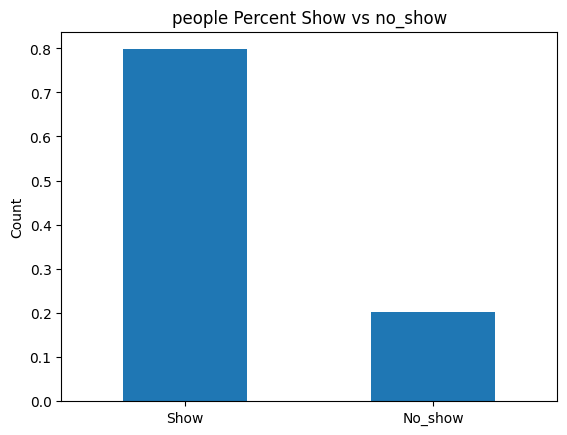

In [14]:
df['no_show'].value_counts(normalize=True).plot(kind='bar', title='people Percent Show vs no_show')
plt.ylabel('Count')
x = ('Show', 'No_show')
x_pos = np.arange(len(x))
plt.xticks(x_pos, x, rotation=0);

 Our dataset contains a total of 110,527 scheduled appointments. Analysis of attendance behavior reveals that 79.8% of patients showed up, while 20.2% did not attend.

In real numbers, this means approximately 88,201 appointments were attended, and 22,326 were missed. The show-up count was derived by applying the percentage to the total dataset size, giving an expected value of 88,200.5, rounded to the nearest whole number.

2-Does sending an SMS reminder reduce the likelihood of a no-show?


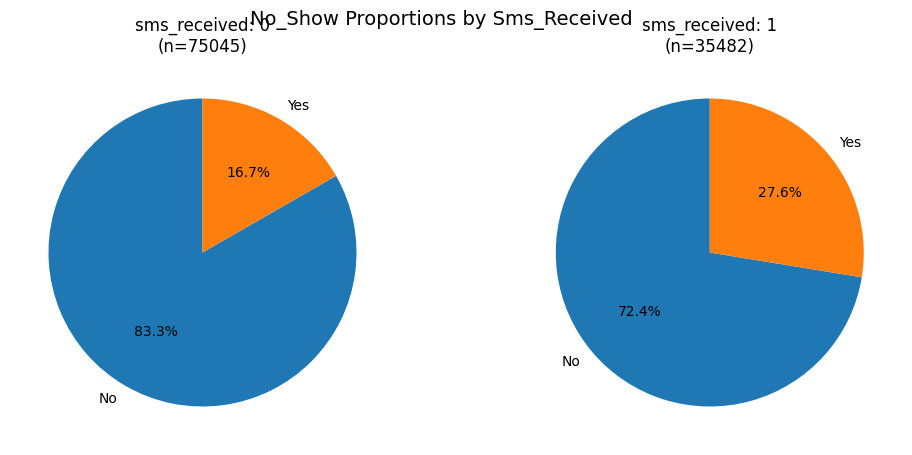

no_show,No,Yes
sms_received,,
0,0.832967,0.167033
1,0.724255,0.275745


In [15]:
show_proportion(df, 'sms_received')



An analysis of 110,527 appointments compared attendance rates between patients with and without SMS reminders.

No SMS received: 83.3% showed up, 16.7% no-shows

SMS received: 72.4% showed up, 27.6% no-shows

Surprisingly, patients who received SMS reminders had a higher no_show rate than those who didn’t 
the opposite of what we would expect.

This result suggests that SMS reminders may not be effective as implemented, or that they’re being sent to higher-risk groups. It could also reflect issues such as reminder timing, message content, or data quality.

3-Does receiving a scholarship influence whether patients attend their appointments?

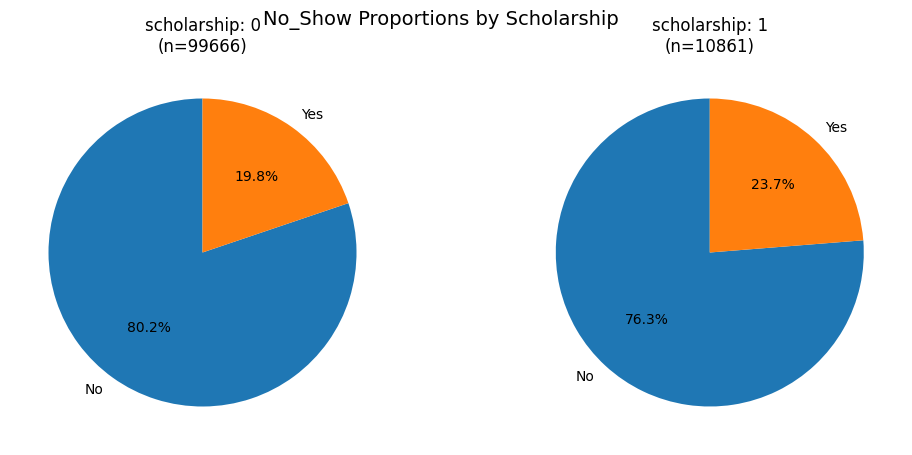

no_show,No,Yes
scholarship,,
0,0.801928,0.198072
1,0.762637,0.237363


In [16]:
show_proportion(df, 'scholarship')


his shows only a small difference, suggesting that scholarship status has no clear impact on appointment attendance.

4-Is age related to the likelihood of a no-show, and what is the distribution of age among patients?


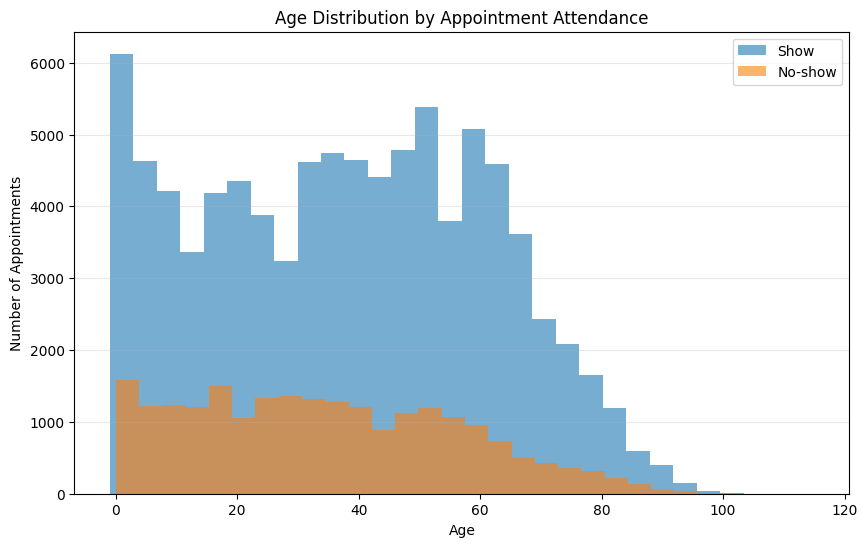

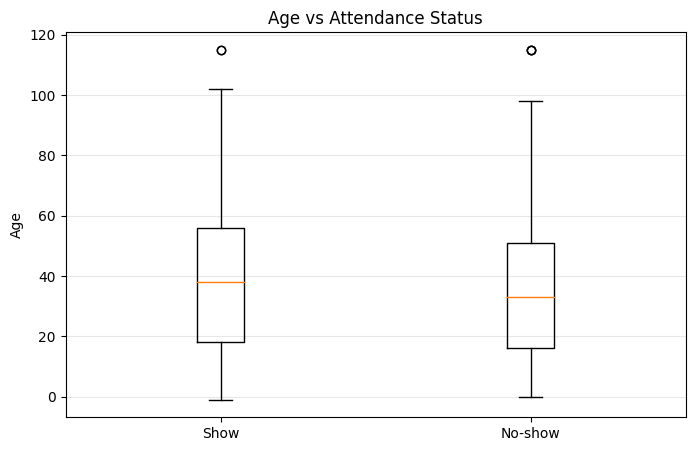

Summary Statistics by Group:

Show:
 count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64 

No-show:
 count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64


In [17]:

# Make sure labels are clear
df['no_show'] = df['no_show'].replace({'Yes': 'No-show', 'No': 'Show'})

# Separate data
show_ages = df.loc[df['no_show'] == 'Show', 'age']
noshow_ages = df.loc[df['no_show'] == 'No-show', 'age']

# --- 1. Histogram ---
plt.figure(figsize=(10,6))
plt.hist(show_ages, bins=30, alpha=0.6, label='Show')
plt.hist(noshow_ages, bins=30, alpha=0.6, label='No-show')
plt.title('Age Distribution by Appointment Attendance')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 2. Boxplot ---
plt.figure(figsize=(8,5))
plt.boxplot([show_ages, noshow_ages], labels=['Show', 'No-show'])
plt.title('Age vs Attendance Status')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 3. Summary statistics ---
print("Summary Statistics by Group:\n")
print("Show:\n", show_ages.describe(), "\n")
print("No-show:\n", noshow_ages.describe())

The analysis shows a noticeable difference in attendance by age.

Patients who missed their appointments have a mean age of 34,

While those who showed up have a mean age of 37.

Infants and young children account for a large share of both show-ups and no-shows, indicating high appointment activity in these age groups.
However, no-shows are most common among patients aged 0–30, suggesting younger individuals are more likely to miss appointments.

<a id='conclusions'></a>
## Conclusions

-  From the analysis of the dataset containing 110,527 medical appointments, it was found that approximately 20% of all appointments were missed, while 80% were attended. This indicates that 1 out of every 5 patients did not show up for their scheduled appointment.

-  When examining the effect of SMS reminders, around 32% of all appointments had an SMS sent to the patient. Surprisingly, the no-show rate among those who received an SMS was higher than for those who did not. This result suggests that SMS reminders alone may not be an effective method to improve attendance.

-  Regarding age, the average age of patients who missed their appointments was lower than those who attended. Younger patients, particularly those under 30 years old, showed a higher tendency to miss appointments, while middle-aged and elderly patients 
were more consistent in showing up

## Limitations


-  Repeated Appointments Bias The dataset contains more appointments (110,527) than unique patients, which means some patients had multiple appointments. Patients who repeatedly miss appointments can bias the overall no-show rate. Future analysis should consider unique patients or examine patterns of repeated no-shows.

- Overlapping Conditions
Some patients may have multiple health conditions, but the analysis considered each variable independently. This simplification may hide combined effects that could influence attendance.
